In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [6]:
with open("jmh-result.json", "r") as file:
    json_file = json.load(file)

In [17]:
import re


In [23]:
average_time = {}
for i in range(len(json_file)):
    benchmark = json_file[i]['benchmark']
    benchmark = re.sub('com.test.MyBenchmark.test',"", benchmark)
    benchmark = tuple(map(int, benchmark.split("vs")))
    time = json_file[i]['primaryMetric']['score']
    average_time[benchmark] = time

In [26]:
final_size = []
initial_size = []
time = []
for k, v in average_time.items():
    final_size.append(k[0])
    initial_size.append(k[1])
    time.append(v)

In [30]:
df = pd.DataFrame(data = {"final_size": final_size, "initial_size": initial_size, "average_time": time})

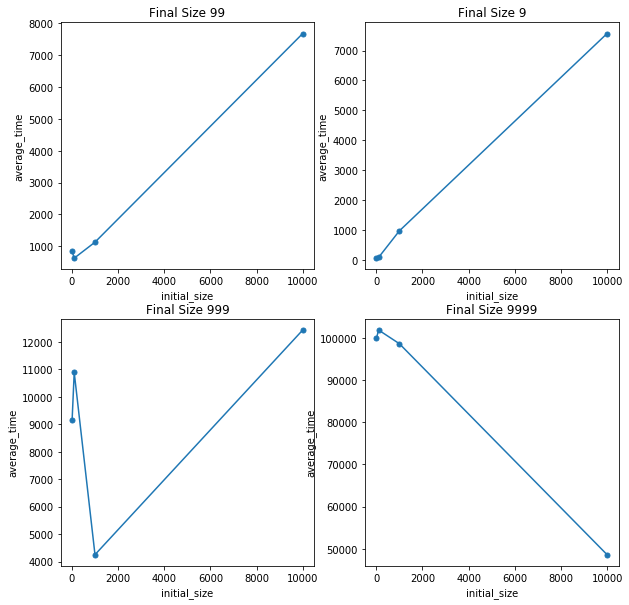

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
idx = 0
di = [0, 0, 1, 1]
dj = [0, 1, 0, 1]
for n in set(final_size):
    df_n = df[df['final_size'] == n]
    axs[di[idx], dj[idx]].set_title("Final Size "+str(n))
    axs[di[idx], dj[idx]].set_xlabel("initial_size")
    axs[di[idx], dj[idx]].set_ylabel("average_time")
    axs[di[idx], dj[idx]].plot(df_n['initial_size'], df_n['average_time'], marker='.', markersize=10)
    idx += 1